In [1]:
%matplotlib inline

from HeaderP import *
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   }
plt.rcParams.update(params)


    

/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

In [2]:
abun_apog=['M_H','C_FE','N_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','S_FE','K_FE','CA_FE','TI_FE',
           'V_FE','MN_FE','NI_FE','P_FE','CR_FE','CO_FE','ALPHA_M']
print(len(abun_apog))

19


In [35]:
#df_CM=pd.read_pickle('CannonDR16.pkl')
#df_rc=df_CM.loc[df_CM['DP']>230]
#df_rc

df_CM=pd.read_pickle('ASstars.pkl')
df_CM

,_RAJ2000,_DEJ2000,KIC,_2MASS,Teff,e_Teff,FeH,e_FeH,AFe,e_AFe,...,GAIA_R_HI,TEFF_SPEC,LOGG_SPEC,2MASS,X,Y,z,R,Age,Age_err
0,291.289042,36.749972,1027110.0,19250937+3644599,4177.600098,51.799999,-0.232,0.025,0.205,0.015,...,3217.648255,4072.300049,1.9168,19250937+3644599,1.042408,-2.775009,0.506092,7.676705,10.046155,0.001603
1,291.334208,36.786611,1027337.0,19252021+3647118,4636.000000,67.300003,0.275,0.024,0.023,0.010,...,1409.484955,4564.500000,2.9858,19252021+3647118,0.472173,-1.260299,0.229390,7.829921,6.280585,0.001256
2,290.886667,36.872417,1160789.0,19233280+3652207,4729.600098,72.300003,-0.257,0.034,0.188,0.015,...,721.006107,4647.799805,2.6310,19233280+3652207,0.245277,-0.651732,0.123180,7.981377,7.744617,0.001358
3,290.951042,36.829889,1160986.0,19234825+3649476,4339.700195,61.400002,0.135,0.022,0.029,0.012,...,5032.598416,4238.500000,2.1333,19234825+3649476,1.620785,-4.303152,0.808011,7.861500,NaN,NaN
4,291.072750,36.862778,1161447.0,19241746+3651460,4776.100098,86.199997,0.058,0.029,-0.006,0.013,...,2634.231443,4725.399902,2.8051,19241746+3651460,0.858445,-2.288122,0.426253,7.689859,2.488857,0.001466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6722,290.276000,52.006556,12784948.0,19210624+5200236,4956.600098,83.199997,-0.381,0.042,0.092,0.016,...,2240.557218,4936.899902,2.8404,19210624+5200236,0.237688,-2.030086,0.616187,8.217035,2.992265,0.001390
6723,290.349000,52.083139,12785083.0,19212376+5204593,4689.100098,70.000000,-0.001,0.029,0.083,0.012,...,1696.840793,4589.299805,2.6851,19212376+5204593,0.179805,-1.557333,0.472257,8.169995,4.415704,0.001611
6724,290.448583,52.093472,12785250.0,19214766+5205365,4764.100098,85.400002,-0.312,0.035,0.031,0.017,...,2749.277888,4691.200195,2.6956,19214766+5205365,0.285577,-2.486696,0.751537,8.295888,2.333458,0.001343
6725,289.601292,52.264417,12884116.0,19182431+5215519,4642.000000,68.000000,0.008,0.028,0.047,0.012,...,1427.044564,4558.799805,2.8655,19182431+5215519,0.152308,-1.317398,0.411984,8.154807,8.609936,0.001164


In [36]:
df_CM=df_CM[np.append(abun_apog,'KIC')]
for i in abun_apog:
    df_CM=df_CM.loc[abs(df_CM[i])<5]

for i in abun_apog:
    df_CM[i]=(df_CM[i]-np.mean(df_CM[i]))/np.std(df_CM[i])
    

In [37]:
df_CM[abun_apog]

,M_H,C_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,S_FE,K_FE,CA_FE,TI_FE,V_FE,MN_FE,NI_FE,P_FE,CR_FE,CO_FE,ALPHA_M
1,1.089831,0.259917,1.342389,-0.474716,0.875650,-0.303917,-0.132133,-0.054118,-0.537590,-0.198891,-0.324436,0.886703,-0.251619,1.450613,0.997075,0.314755,0.000655,0.713336,-0.464008
2,-1.094048,2.093883,-0.617213,1.765713,-0.715956,1.388627,1.520354,2.179560,1.810408,1.230646,0.966679,0.850614,0.995788,-1.447197,1.289082,0.130505,-1.208968,0.378676,1.752260
3,0.420888,-0.427537,0.251087,-0.255302,-0.000731,-0.598192,0.116747,-0.527688,-0.980351,-0.216530,-0.597872,0.168958,0.142125,1.727402,0.982369,0.189809,-1.322124,0.524645,-0.513556
4,0.218802,-0.325835,-0.210969,-1.148771,0.344088,-1.098704,0.055452,-0.889526,0.068899,-0.563474,-0.050586,-1.029870,-0.011947,0.663460,0.687391,0.600929,-0.851116,0.826004,-0.950584
5,0.230014,0.508753,-0.355883,-0.233669,-0.204746,-0.431829,-0.654275,-0.418089,-0.598694,-0.160764,-0.722971,-0.457317,-0.969692,0.053560,-0.628616,-0.041468,0.262738,0.428180,-0.368929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6720,-1.092665,0.175859,-0.967781,0.729815,-1.846229,0.083076,0.905304,-0.161603,0.493060,0.394853,0.217999,-0.424112,-0.063874,-1.374176,0.264802,-0.736879,-0.046528,-1.299838,0.281353
6721,-0.298161,-0.053624,-0.505110,-0.692440,0.573286,-0.052711,0.491995,0.225825,-0.147370,0.082512,0.268113,-1.293859,0.496430,-0.012203,-0.406183,-0.209119,-1.390474,0.891092,0.072806
6723,-0.036152,1.546955,-0.734456,0.597564,-1.057271,0.226295,-0.301320,0.370857,0.400962,0.044856,-0.144767,-0.170130,-1.094200,-0.283339,-0.061307,-0.256204,-0.499078,-0.307766,0.397057
6724,-1.373746,0.569377,-0.756653,0.241631,0.990224,-0.187951,1.140773,0.278334,-0.661041,1.290651,0.830849,-0.674653,1.039814,-0.488226,1.404862,2.241844,0.660862,-1.950740,-0.001898


In [38]:
import time
import warnings

import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 2,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}



plt.figure(figsize=(45,30))

X = StandardScaler().fit_transform(df_CM[abun_apog].values)
params = default_base.copy()
bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])


connectivity = kneighbors_graph(X, n_neighbors=params['n_neighbors'], include_self=False)

# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

ward = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage='ward')

ward.fit(X)
    


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func=<function mean at 0x110cb4950>)

<Figure size 3240x2160 with 0 Axes>

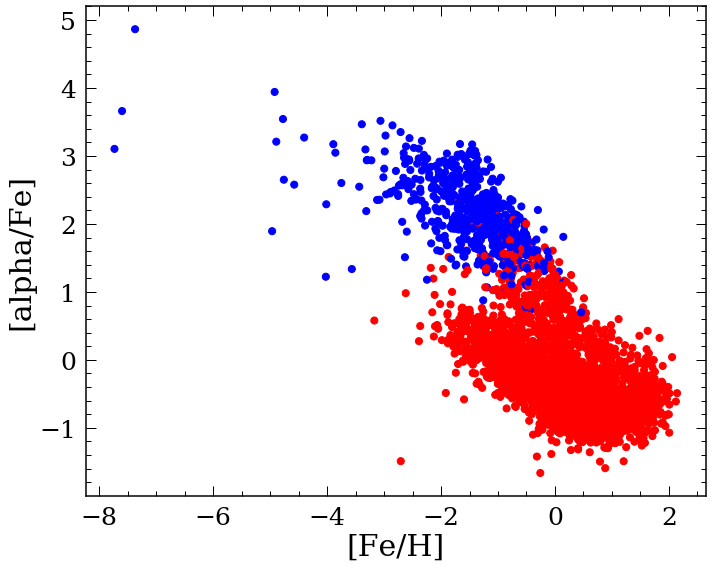

In [39]:
#y_pred = ward.predict(X)
#y_pred = ward.labels_.astype(np.int)
y_pred = ward.fit_predict(X)

colors = np.array(list(islice(cycle(['r','b']),
                                      int(max(y_pred) + 1))))

plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,-1], s=50, color=colors[y_pred],)
plt.ylabel('[alpha/Fe]')
plt.xlabel('[Fe/H]')
plt.tight_layout()


In [56]:
df_CM=pd.read_pickle('CannonDR16.pkl')
for i in abun_apog:
    df_CM=df_CM.loc[abs(df_CM[i])<5]
df_rc=df_CM.loc[df_CM['DP']>230]
df_rc

,ID,[Fe/H],T_{eff},Log(g),[Mg/Fe],DP,Dnu,LogAge,[Fe/H]_err,T_{eff}_err,...,LOGG_SPEC,FLAGREAD,X,Y,z,R,Age,Age_err,LogAge_upp,LogAge_low
171,2M19441366+4122541,0.120943,4815.302225,2.595823,-0.049038,304.012215,5.183211,3.406383,0.011284,0.024198,...,2.9449,0,0.401367,-1.530668,0.238412,7.947428,2.549075,1.286976,4142.513262,1568.560403
186,2M19450118+4135207,0.008879,4572.659167,2.410126,0.121836,285.456890,3.928058,3.702256,0.011802,0.020920,...,2.6547,0,0.523980,-2.035301,0.315525,7.941268,5.037976,2.525732,8161.379272,3109.915754
189,2M19450323+4055419,0.200213,4708.835329,2.519983,-0.018351,287.245422,3.719000,3.125394,0.009936,0.021391,...,2.8302,0,0.369017,-1.375425,0.205534,7.950854,1.334731,0.665233,2156.556158,826.089267
190,2M19450489+4109386,-0.073075,4834.349750,2.512783,-0.007077,322.074661,4.032540,3.376476,0.012416,0.026403,...,2.8684,0,0.221736,-0.838621,0.126866,8.022218,2.379449,1.215330,3887.183794,1456.524223
198,2M19451972+4110314,0.241882,4678.026266,2.384397,0.023979,337.018767,3.127945,4.168429,0.009303,0.019255,...,2.7941,0,0.374501,-1.419973,0.213899,7.953286,14.737667,7.150681,23531.495113,9230.133555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245207,2M08202257+2659377,-0.156872,4829.071035,2.359161,0.076337,315.531265,3.864868,3.495566,0.012589,0.025038,...,2.7349,0,-0.765221,0.220235,0.468440,8.967926,3.130156,1.617008,5140.158170,1906.142416
245210,2M08203084+2809198,-0.167575,4640.441607,2.358262,0.147146,317.293223,3.444234,3.786975,0.012749,0.022483,...,2.6849,0,-1.526808,0.402642,0.942472,9.735138,6.123154,3.088572,9946.581077,3769.437232
245259,2M13262008+3158455,-0.185766,4791.941486,2.514160,0.230639,241.775080,4.315295,3.271121,0.013091,0.031238,...,2.7705,0,0.120013,-0.291423,1.989496,8.085241,1.866899,0.941531,3032.413789,1149.352675
245341,2M13304129+3311053,-0.242482,4683.162733,2.358326,0.213544,286.857867,3.466416,3.845050,0.011963,0.023342,...,2.6112,0,0.077161,-0.222150,1.279357,8.125877,6.999222,3.501633,11327.904997,4324.639552


In [57]:
X = StandardScaler().fit_transform(df_rc[abun_apog].values)
y_pred=np.ones(len(X),dtype=bool)

In [31]:
#y_pred=np.ones(len(X),dtype=bool)
nums=5
for i in trange(nums+1):
    inds=range(i*int(len(X)/nums),int(len(X)/nums)*(i+1))
    if i==nums:
        inds=range(i*int(len(X)/nums),len(X))
    print(i,inds[-1],len(y_pred[inds]),len(X[inds,:]))
    y_pred[inds] = ward.fit_predict(X[inds,:])

  0%|          | 0/6 [00:00<?, ?it/s]

0 9830 9831 9831


 17%|█▋        | 1/6 [00:08<00:42,  8.59s/it]

1 19661 9831 9831


 33%|███▎      | 2/6 [00:18<00:35,  8.90s/it]

2 29492 9831 9831


 50%|█████     | 3/6 [00:25<00:25,  8.54s/it]

3 39323 9831 9831


 67%|██████▋   | 4/6 [00:34<00:17,  8.55s/it]

4 49154 9831 9831


100%|██████████| 6/6 [00:42<00:00,  7.06s/it]

5 49157 3 3


In [58]:
y_pred=ward.fit_predict(X)

In [61]:
sum(y_pred)

3543

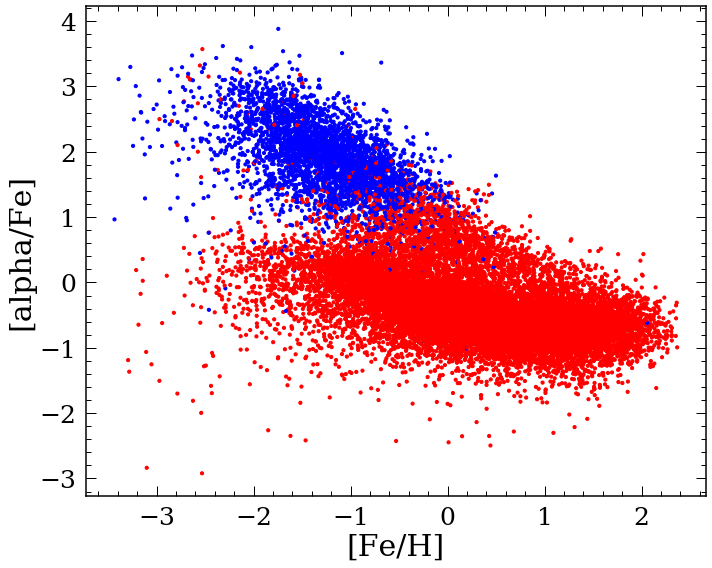

In [67]:
y_pred = ward.predict(X)
#y_pred = ward.labels_.astype(np.int)
#y_pred = ward.fit_predict(X)

colors = np.array(list(islice(cycle(['r','b']),
                                      int(max(y_pred) + 1))))

plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,-1], s=10, color=colors[y_pred])
plt.ylabel('[alpha/Fe]')
plt.xlabel('[Fe/H]')
plt.tight_layout()



In [69]:
y_pred=np.array(y_pred,dtype=bool)

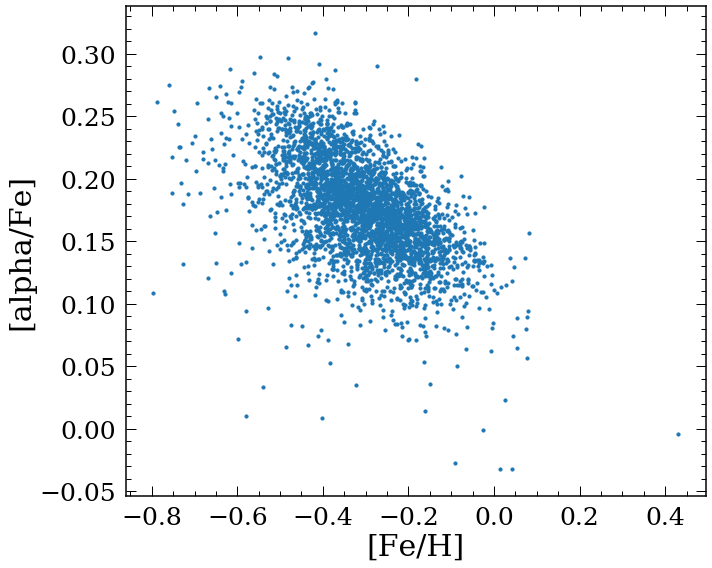

In [71]:
df_rc=df_rc.reset_index(drop=True)
hialpha=df_rc[y_pred]
lowalpha=df_rc[~y_pred]
plt.figure(figsize=(10,8))
plt.scatter(hialpha['M_H'], hialpha['ALPHA_M'], s=10)
plt.ylabel('[alpha/Fe]')
plt.xlabel('[Fe/H]')
plt.tight_layout()

In [72]:
df_rc['hi_low']=y_pred

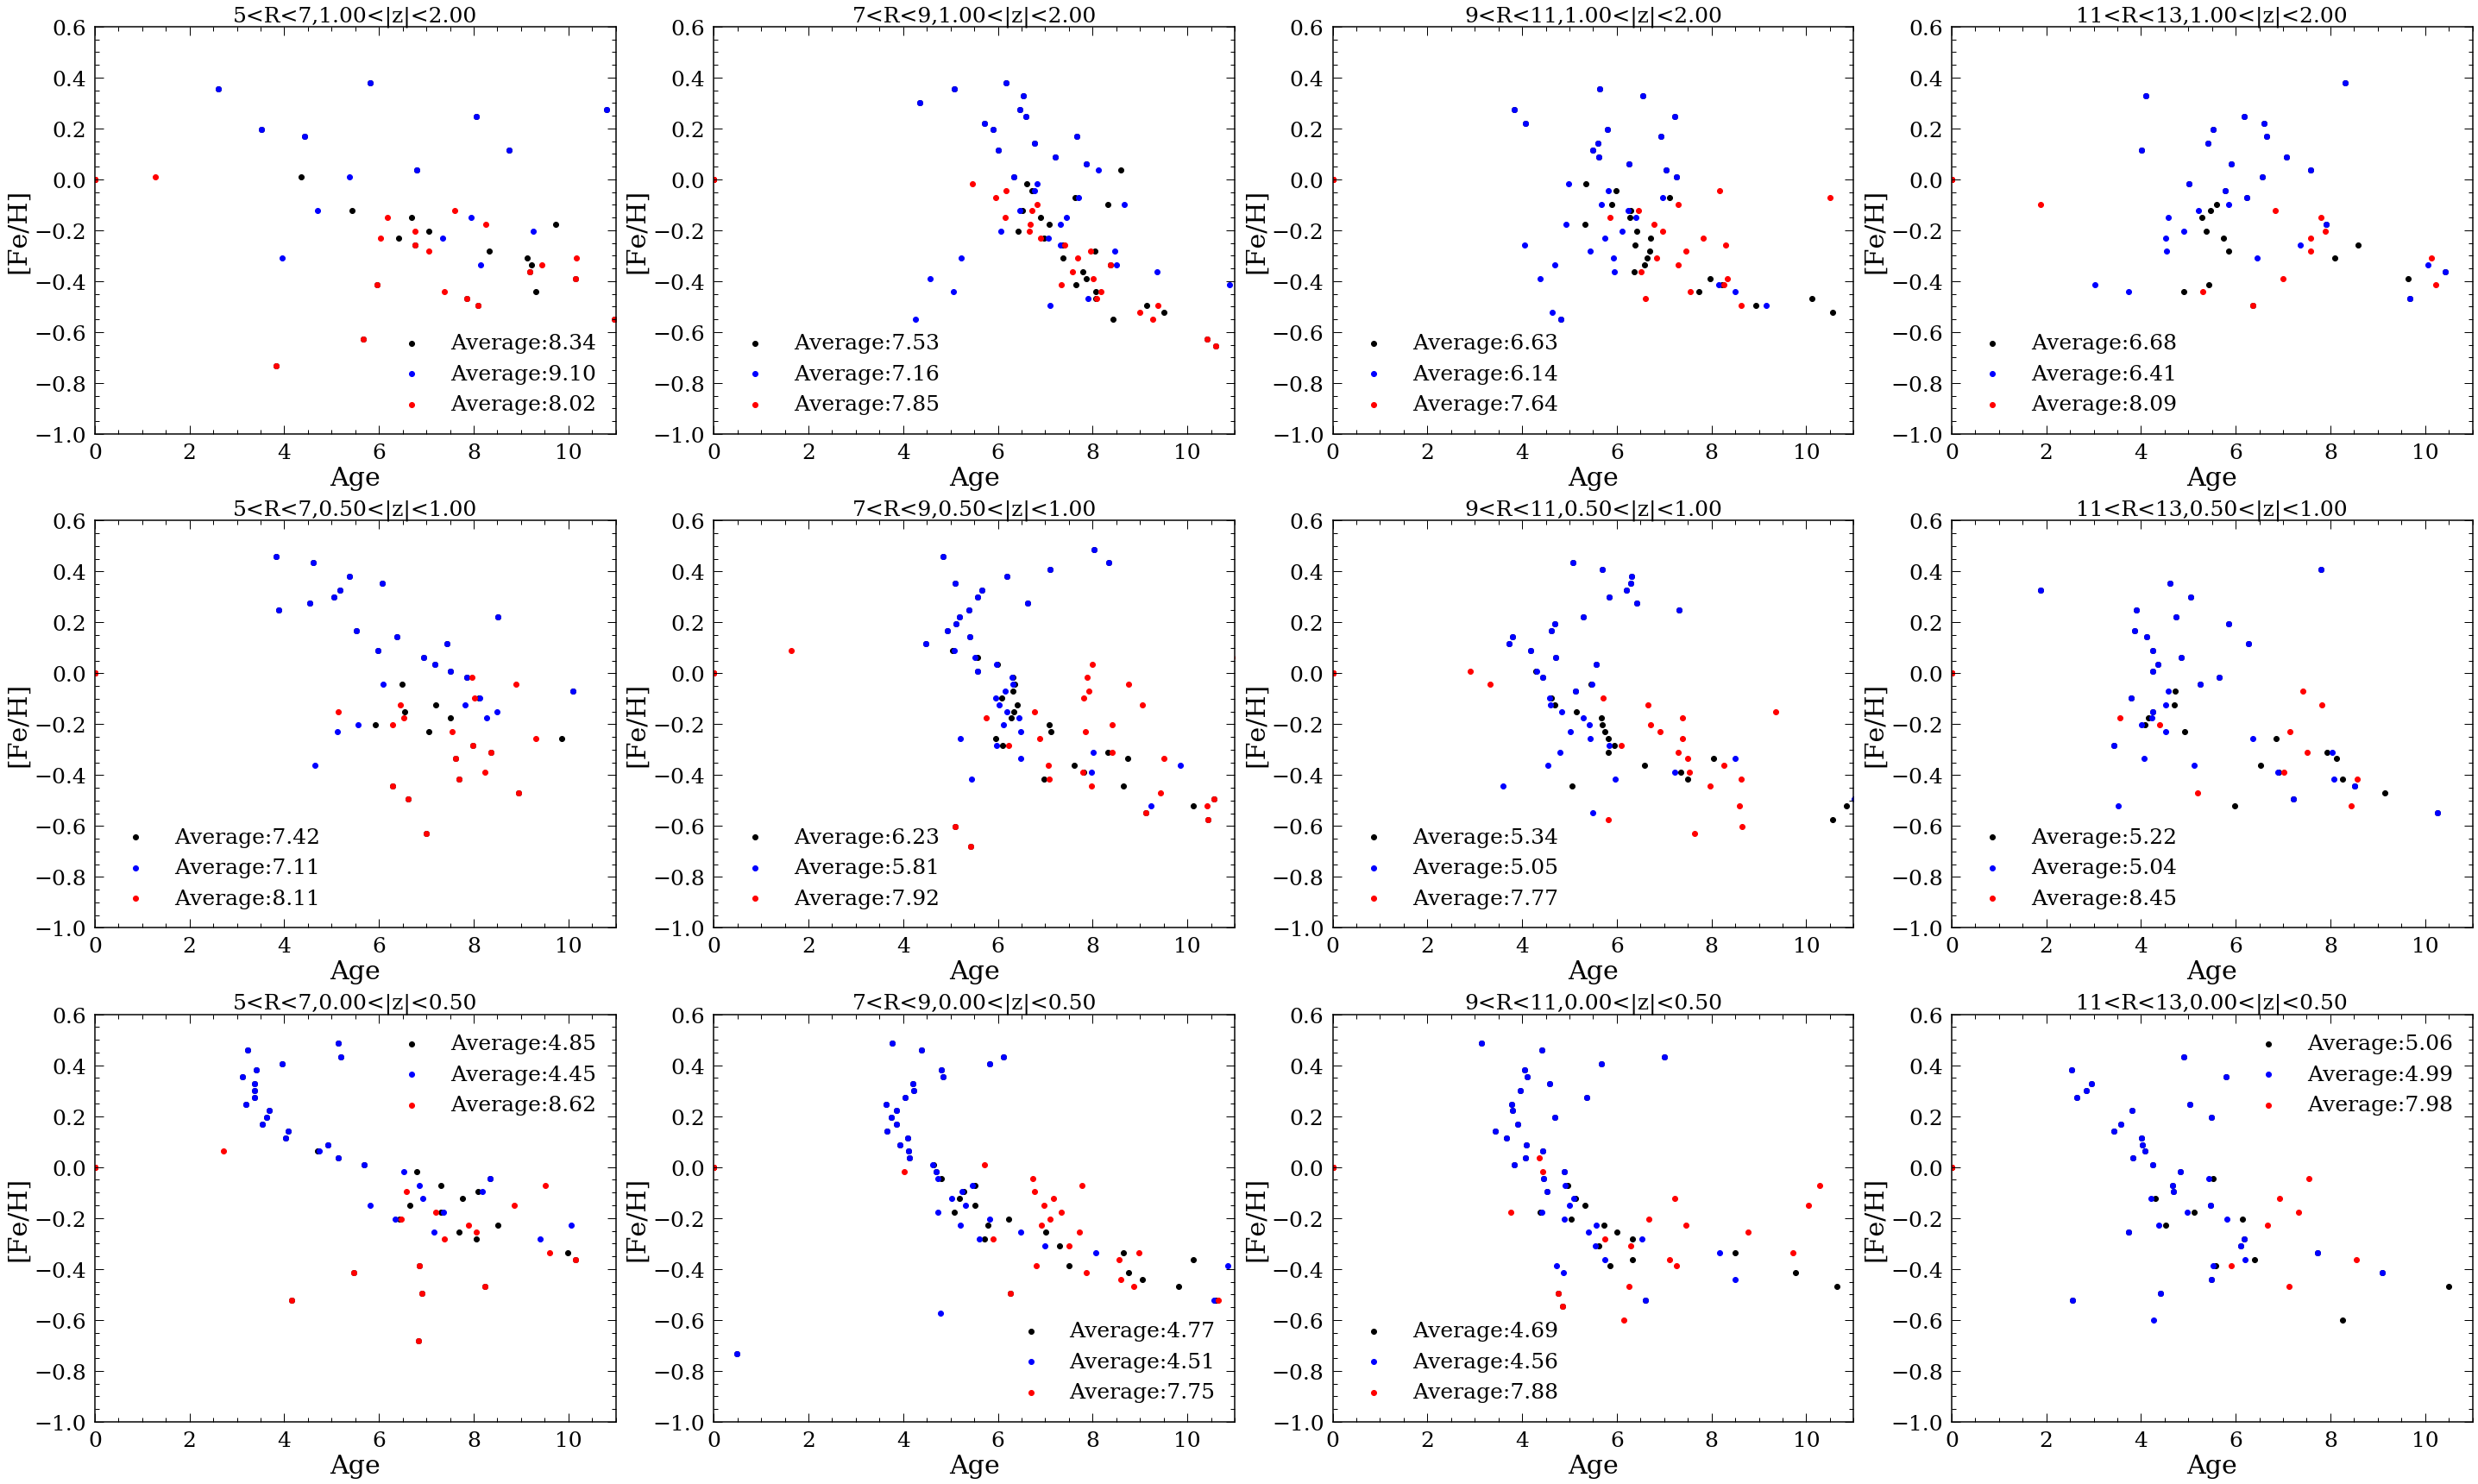

In [75]:
#Rbin=[5,7,9,11,13]
#zbin=[0,0.5,1,2]
Rbin=[2,1,0.5,0]
zbin=[5,7,9,11,13]
plt.figure(figsize=(40,24))
count=1
for i in range(len(Rbin)-1):
    df_all=df_rc.loc[df_rc['z']>Rbin[i+1]]
    df_all=df_all.loc[df_all['z']<Rbin[i]]
        
    for j in range(len(zbin)-1):
        df_all_z=df_all.loc[abs(df_all['R'])>zbin[j]]
        df_all_z=df_all_z.loc[abs(df_all_z['R'])<zbin[j+1]]
        
        df_all_z=df_all_z.dropna(subset=['M_H','Age'])
        
        ha_bin_z=df_all_z.loc[df_all_z['hi_low']==True]
        la_bin_z=df_all_z.loc[df_all_z['hi_low']==False]
        
        #meanfeh,meanage,meanage_err,starnumb=getave_age(df_all_z['Age'].values,df_all_z['M_H'].values)
        allage=np.append(la_bin_z['Age'].values,ha_bin_z['Age'].values)
        allmh=np.append(la_bin_z['M_H'].values,ha_bin_z['M_H'].values)
        meanfeh,meanage,meanage_err,starnumb=getave_age(allage,allmh)
        meanfeh_la,meanage_la,meanage_err_la,starnumb_la=getave_age(la_bin_z['Age'].values,
                                                                    la_bin_z['M_H'].values)
        meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha=getave_age(ha_bin_z['Age'].values,
                                                                    ha_bin_z['M_H'].values)
        clear_output(wait = True)
        plt.subplot(3,4,count)
        #plt.errorbar(meanage,meanfeh,xerr=meanage_err,fmt='ko',label='Average:%.2f'%np.mean(allage))
        #plt.errorbar(meanage_la,meanfeh_la,xerr=meanage_err_la,fmt='bo',label='Average:%.2f'%np.mean(la_bin_z['Age']))
        #plt.errorbar(meanage_ha,meanfeh_ha,xerr=meanage_err_ha,fmt='ro',label='Average:%.2f'%np.mean(ha_bin_z['Age']))
        
        plt.scatter(meanage,meanfeh,c='k',label='Average:%.2f'%np.mean(allage))
        plt.scatter(meanage_la,meanfeh_la,c='b',label='Average:%.2f'%np.mean(la_bin_z['Age']))
        plt.scatter(meanage_ha,meanfeh_ha,c='r',label='Average:%.2f'%np.mean(ha_bin_z['Age']))
        
        #plt.xlim([0,10])
        #plt.ylim([-2,0.5])
        plt.xlabel('Age')
        plt.ylabel('[Fe/H]')
        #plt.title('All stars',fontsize=25)

        #plt.scatter(ha_bin['Age'],ha_bin['M_H'],c='r',alpha=0.5)
        #plt.scatter(la_bin['Age'],la_bin['M_H'],c='b',alpha=0.5)
        plt.xlim([0,11])
        plt.ylim([-1,0.6])
        plt.legend()
        count=count+1
        plt.title('%d<R<%d,%.2f<|z|<%.2f'%(zbin[j],zbin[j+1],Rbin[i+1],Rbin[i]),fontsize=25)
        plt.tight_layout()
        
#plt.savefig('FeAge.png')